In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Generate country code so as to draw the worldMap
!pip install dataprep
from dataprep.clean import clean_country
# Use plotly to draw plots with interactive
import plotly.express as px
import plotly.graph_objects as go
# Use pandas_alive to draw plots with animation
!pip install bar_chart_race
import bar_chart_race as bcr

# Save figure
import plotly.offline as pyo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 47.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 23.

In [ ]:
!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 55.3 MB/s eta 0:00:00


<ipython-input-3-cab9fcf391db>:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-3-cab9fcf391db>:4: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [ ]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3.1 Menu and Nutrition value of McDonald's

In [ ]:
# import data and choose meaningful columns
df = pd.read_csv('/content/drive/MyDrive/CS5346/project/dataset/3_1_Menu.csv',encoding='gbk')

# 将数据转换为数值类型
df = df.apply(pd.to_numeric, errors='ignore')

# 将类别变量转换为有序类别
df[['Category', 'Item']] = df[['Category', 'Item']].astype('category')
df['Category'] = df['Category'].cat.reorder_categories([
    'Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides',
    'Desserts', 'Beverages', 'Coffee & Tea', 'Smoothies & Shakes'
])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Category                       260 non-null    category
 1   Item                           260 non-null    category
 2   Serving Size(g or ml)          260 non-null    int64   
 3   Calories                       260 non-null    int64   
 4   Calories from Fat              260 non-null    int64   
 5   Total Fat                      260 non-null    float64 
 6   Total Fat (% Daily Value)      260 non-null    int64   
 7   Saturated Fat                  260 non-null    float64 
 8   Saturated Fat (% Daily Value)  260 non-null    int64   
 9   Trans Fat                      260 non-null    float64 
 10  Cholesterol                    260 non-null    int64   
 11  Cholesterol (% Daily Value)    260 non-null    int64   
 12  Sodium                         260 n

In [ ]:
# Create Stacked Bar Chart with interaction and animation
fig1 = px.bar(df,  x='Category', y='Serving Size(g or ml)',color='Calories', barmode='stack', custom_data=['Item', 'Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein', 'Calories'])
fig1.update_layout(title={'text':"McDonald's Menu Nutrition Facts", 'x':0.5, 'y':0.96},  xaxis_title='Category', yaxis_title='Serving Size (g or ml)', width=800, height=1000)

# Add hover and click events for interactive
fig1.update_traces(hovertemplate="<br>".join([
    "Item: %{customdata[0]}",
    "Category: %{x}",
    "Serving Size (g or ml): %{y}",
    "Calories: %{customdata[10]}",
    "Total Fat (g): %{customdata[1]}",
    "Saturated Fat (g): %{customdata[2]}",
    "Trans Fat (g): %{customdata[3]}",
    "Cholesterol (mg): %{customdata[4]}",
    "Sodium (mg): %{customdata[5]}",
    "Carbohydrates (g): %{customdata[6]}",
    "Dietary Fiber (g): %{customdata[7]}",
    "Sugars (g): %{customdata[8]}",
    "Protein (g): %{customdata[9]}"
]))

fig1.update_layout(clickmode='event+select')

fig1.show()


# save fig as html files
pyo.plot(fig1, filename='3.1McDonalds Menu Nutrition Facts_StackedBarChart.html')

'3.1McDonalds Menu Nutrition Facts_StackedBarChart.html'

In [ ]:
# Use 'Category' as the main category and 'Item' as the sub-category, draw an interactive pie chart to show each proportion.
fig2 = px.sunburst(df, path=['Category', 'Item'], values='Serving Size(g or ml)',
                  color='Calories')

fig2.update_layout(title={'text':"McDonald's Menu Nutritional Value Distribution", 'x':0.5, 'y':0.95},
         width=1000,
         height=1000)
fig2.show()
# save fig as html files
pyo.plot(fig2, filename='3.1 McDonalds Menu Nutrition Facts_pieChart.html')

'3.1McDonalds Menu Nutrition Facts_pieChart.html'

## 3.2.2 McDonald’s number in different countries (can add other info like gdp later)


In [ ]:
# import data and choose meaningful columns
df = pd.read_csv('/content/drive/MyDrive/CS5346/project/dataset/3_2_2_McNum_gdp.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      101 non-null    object 
 1   Number of McDonald's                         101 non-null    int64  
 2   First Opening                                101 non-null    object 
 3   Number of McDonald's per Million Population  101 non-null    float64
 4   gdp                                          0 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.1+ KB


In [ ]:
# Query 1.2: Creating a sorted dataframe for "country-totalTerrorists"
# transfer the code into a map-friendly way
df = clean_country(df, 'Country', output_format='alpha-3')

# Renaming the column to country_code
df.rename(columns = {'Country_clean':'Country_code'}, inplace = True)

/usr/local/lib/python3.9/dist-packages/dask/dataframe/core.py:6751: FutureWarning:

Meta is not valid, `map_partitions` and `map_overlap` expects output to be a pandas object. Try passing a pandas object as meta or a dict or tuple representing the (name, dtype) of the columns. In the future the meta you passed will not work.

                                     

Country Cleaning Report:
	101 values cleaned (100.0%)
Result contains 101 (100.0%) values in the correct format and 0 null values (0.0%)


In [ ]:
df['First Opening']

0       1940/5/15
1       1990/10/8
2       1971/7/21
3      1971/11/22
4       1972/6/30
          ...    
96       1996/5/3
97     1997/12/15
98      2006/8/10
99      1999/8/13
100      1997/8/1
Name: First Opening, Length: 101, dtype: object

In [ ]:
# Plot an interactive world map to show most targeted countries by Terrorism
fig = go.Figure(data=go.Choropleth(
    locations = df['Country_code'],
    z = df['Number of McDonald\'s'],
    text = df['Country'],
    customdata=df[['First Opening', 'Number of McDonald\'s per Million Population']],
    colorscale = 'sunsetdark',
    autocolorscale = False,
    reversescale = False,
    marker_line_color = 'darkgray',
    marker_line_width = 0.5,
    colorbar_title = 'Number<br> of McDonald\'s'))

fig.update_layout(
    title={'text':"Number of McDonald\'s Worldwide", 'x':0.46, 'y':0.8},
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'),
    annotations = [dict(
        x = 0.55,
        y = 0.05,
        showarrow = False,
        text = 'The number of McDonald\'s in each country until 2022')],
    height = 800, width = 1000)

# Add hover and click events for interactive
fig.update_traces(hovertemplate="<br>".join([
    "Country: %{text}",
    "Number of McDonald\'s: %{z}",
    "First Opening: %{customdata[0]}",
    "Number of McDonald\'s per Million Population: %{customdata[1]}"
]))

fig.show()

## 3.3.1 Overview Performance ---- McDonald's vs others worldwide

In [ ]:
# import data and choose meaningful columns
df = pd.read_csv('/content/drive/MyDrive/CS5346/project/dataset/3_3_1_OverviewPerformance.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              101 non-null    object 
 1   Brand name           101 non-null    object 
 2   Number of locations  101 non-null    int64  
 3   Revenue(US billion)  33 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ KB


In [ ]:
# --- Interactive bar chart to show top 40 fast food restaurant worldwide
# Query: Among the top 40 fast food chains ranked by the number of stores,
#                      ----- which country has the most fast food brands?
#                      ----- Which country has the largest location number of these fast food brands?
#                      ----- Which brand has the largest location number?

# color: Brand name
# area: Number of locations
# y_axis: Country
# interactive: users can hover over to see relative information

Country_ShopName = df.groupby(['Country', 'Brand name']).sum()
fig = px.bar(
    df.head(40),
    x="Number of locations",
    y="Country",
    color="Brand name",
)

fig.update_layout(title={'text':"Top 40 fast food restaurant worldwide", 'x':0.46, 'y':0.97})

fig.show()

## others_1

In [ ]:
# import data and choose meaningful columns
df = pd.read_csv('/content/drive/MyDrive/CS5346/project/dataset/2 KFC Product list.csv',encoding='gbk')

# 将数据转换为数值类型
df = df.apply(pd.to_numeric, errors='ignore')

# 将类别变量转换为有序类别
df[['Category', 'Item']] = df[['Category', 'Item']].astype('category')

In [ ]:
############ draw the picture

# Use 'Category' as the main category and 'Item' as the sub-category, draw an interactive pie chart to show each proportion.
fig = px.sunburst(df, path=['Category', 'Item'], values='Per Serve Size',
                  color='Energy (kCal)', )

fig.update_layout(title={'text':"KFC's Menu Nutritional Value Distribution", 'x':0.5, 'y':0.95},
         width=1000,
         height=1000)
fig.show()
# save fig as html files
pyo.plot(fig, filename='3.3_KFC Menu_pieChart.html')

'3.3_KFC Menu_pieChart.html'

## Other_2

In [ ]:
# import data and choose meaningful columns
df = pd.read_csv('/content/drive/MyDrive/CS5346/project/dataset/1 Mcdonal_KFC revenue yr.csv',encoding='gbk')
df

,Time,US_McDonalds,China_McDonalds,Other_McDonalds,US_KFC,China_KFC,Other_KFC
0,2000,12623,270,12837,4062,146,3345
1,2001,13099,328,14044,4827,200,3481
2,2002,13487,409,15235,5347,312,3715
3,2003,13745,579,16165,5655,400,3953
4,2004,13691,675,16672,5763,600,4265
5,2005,13758,736,17140,5929,875,4671
6,2006,13755,903,18176,5603,1638,5355
7,2007,13829,1050,19167,5197,2144,6151
8,2008,13862,1325,19310,5132,3128,7239
9,2009,13938,1391,19268,4473,3682,8833


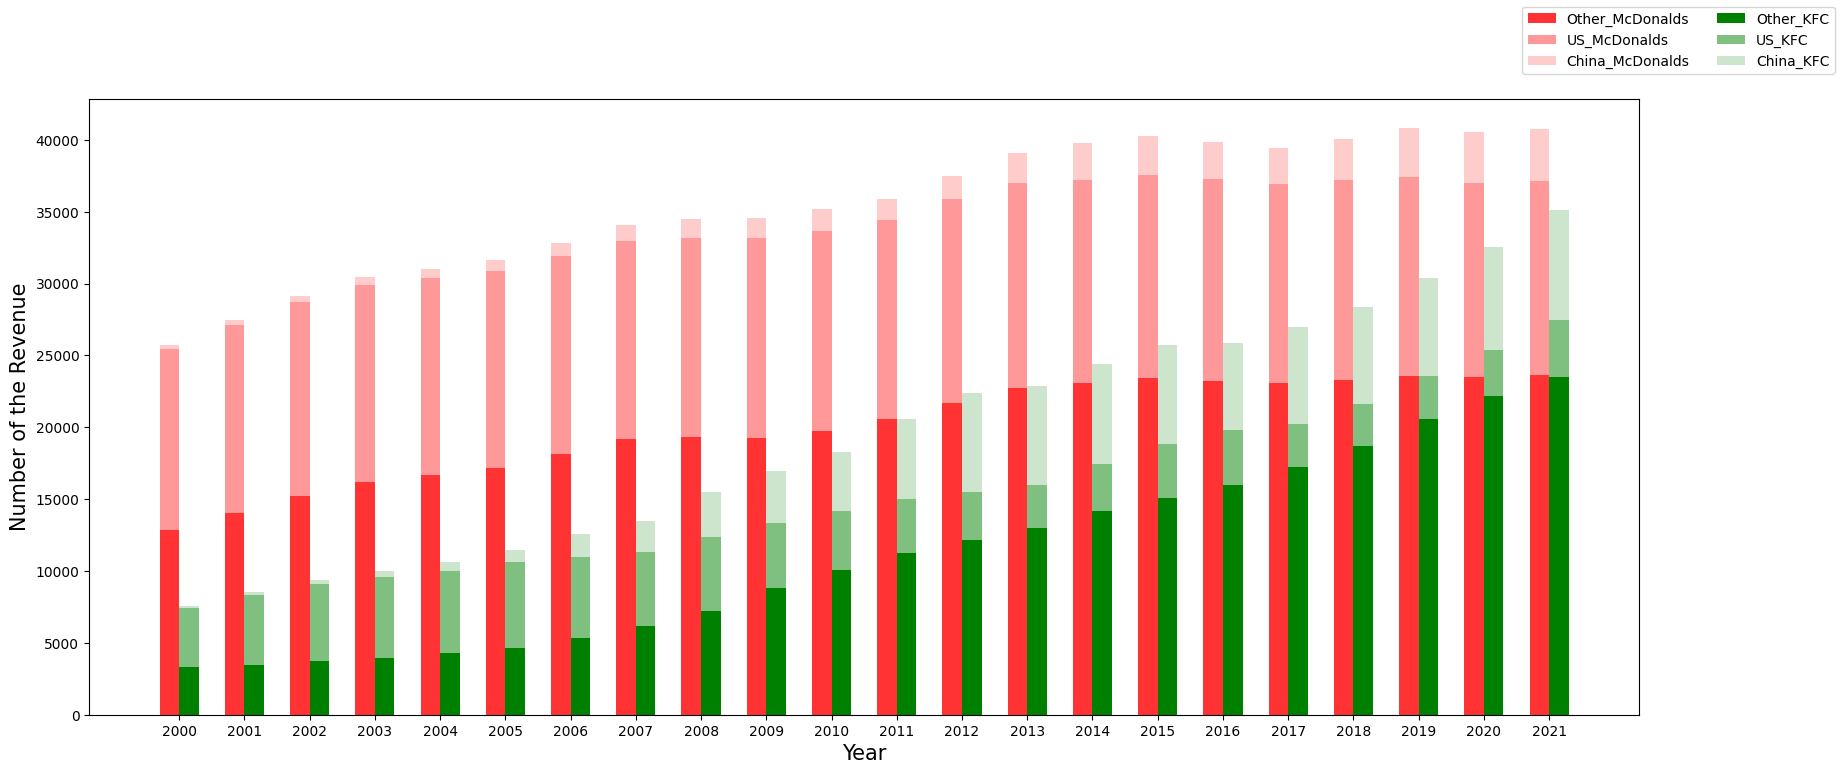

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of the Revenue', fontsize=15)

bar_width = 0.3
pos1 = df["Time"] - bar_width/2
pos2 = df["Time"] + bar_width/2

ss12 = df["US_McDonalds"]
ss13 = df["China_McDonalds"]
ss11 = df["Other_McDonalds"]

ss22 = df["US_KFC"]
ss23 = df["China_KFC"]
ss21 = df["Other_KFC"]

label = ["US_McDonalds","China_McDonalds","Other_McDonalds", "US_KFC","China_KFC","Other_KFC"]

B11 = ax.bar(pos1, ss11.values,width=bar_width, color='r', alpha=0.8, label=label[2])
B12 = ax.bar(pos1, ss12.values,width=bar_width, color='r', alpha=0.4, bottom=ss11.values, label=label[0])
B13 = ax.bar(pos1, ss13.values,width=bar_width, color='r', alpha=0.2, bottom=ss11.values+ss12.values, label=label[1])

B21 = ax.bar(pos2, ss21.values,width=bar_width, color='g', alpha=1, label=label[5])
B22 = ax.bar(pos2, ss22.values,width=bar_width, color='g', alpha=0.5, bottom=ss21.values, label=label[3])
B23 = ax.bar(pos2, ss23.values,width=bar_width, color='g', alpha=0.2, bottom=ss21.values+ss22.values, label=label[4])

ax.set_xticks(df["Time"])
fig.legend(ncol=2, loc='upper right')
plt.show()

import plotly.tools as tls
fig = tls.mpl_to_plotly(fig)

# save fig as jpg files
plt.savefig('other_1_compare_Revenue.jpg')

## Other3

In [ ]:
# import data and choose meaningful columns
df = pd.read_csv('/content/drive/MyDrive/CS5346/project/dataset/5 YUM sales.csv',encoding='gbk')
# df["time"] = int(df["time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             29 non-null     int64  
 1   US_KFC           29 non-null     int64  
 2   China_KFC        29 non-null     float64
 3   US_McDonalds     29 non-null     float64
 4   China_McDonalds  29 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.3 KB


In [ ]:
# draw a dynamic barchart, output as a mp4 file
df.set_index('time', inplace=True)
bcr.bar_chart_race(df=df, filename='SaleRanking.mp4',  n_bars=4,  title='Dynamic Ranking of McDonalds & KFC Sales in US & China(1993-2021)')

/usr/local/lib/python3.9/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.9/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

